In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from tensorflow.keras import models, layers

In [2]:
df = pd.read_csv(r'C:\Users\Kayqu\Desktop\Git\2_Rede_Neural\StudentPerformanceFactors.csv',sep=',')

In [3]:
df

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6602,25,69,High,Medium,No,7,76,Medium,Yes,1,High,Medium,Public,Positive,2,No,High School,Near,Female,68
6603,23,76,High,Medium,No,8,81,Medium,Yes,3,Low,High,Public,Positive,2,No,High School,Near,Female,69
6604,20,90,Medium,Low,Yes,6,65,Low,Yes,3,Low,Medium,Public,Negative,2,No,Postgraduate,Near,Female,68
6605,10,86,High,High,Yes,6,91,High,Yes,2,Low,Medium,Private,Positive,3,No,High School,Far,Female,68


In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

In [5]:
# Ver estatísticas básicas dos dados numéricos
print(df.describe())

       Hours_Studied   Attendance  Sleep_Hours  Previous_Scores  \
count    6607.000000  6607.000000   6607.00000      6607.000000   
mean       19.975329    79.977448      7.02906        75.070531   
std         5.990594    11.547475      1.46812        14.399784   
min         1.000000    60.000000      4.00000        50.000000   
25%        16.000000    70.000000      6.00000        63.000000   
50%        20.000000    80.000000      7.00000        75.000000   
75%        24.000000    90.000000      8.00000        88.000000   
max        44.000000   100.000000     10.00000       100.000000   

       Tutoring_Sessions  Physical_Activity   Exam_Score  
count        6607.000000        6607.000000  6607.000000  
mean            1.493719           2.967610    67.235659  
std             1.230570           1.031231     3.890456  
min             0.000000           0.000000    55.000000  
25%             1.000000           2.000000    65.000000  
50%             1.000000           3.00000

In [6]:
encoder = OneHotEncoder(sparse_output=False, drop='first')

In [7]:
object_columns = df.select_dtypes(include=['object']).columns
df_categorical = df[object_columns]

print(object_columns)

Index(['Parental_Involvement', 'Access_to_Resources',
       'Extracurricular_Activities', 'Motivation_Level', 'Internet_Access',
       'Family_Income', 'Teacher_Quality', 'School_Type', 'Peer_Influence',
       'Learning_Disabilities', 'Parental_Education_Level',
       'Distance_from_Home', 'Gender'],
      dtype='object')


In [8]:
df_categorical_encoded = encoder.fit_transform(df_categorical)

In [9]:
X_encoded_df = pd.DataFrame(df_categorical_encoded, columns=encoder.get_feature_names_out(object_columns))

In [10]:
X_numeric = df.drop(columns=object_columns)
X_final = pd.concat([X_numeric, X_encoded_df], axis=1)

In [11]:
X_final

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score,Parental_Involvement_Low,Parental_Involvement_Medium,Access_to_Resources_Low,...,Peer_Influence_Neutral,Peer_Influence_Positive,Learning_Disabilities_Yes,Parental_Education_Level_High School,Parental_Education_Level_Postgraduate,Parental_Education_Level_nan,Distance_from_Home_Moderate,Distance_from_Home_Near,Distance_from_Home_nan,Gender_Male
0,23,84,7,73,0,3,67,1.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
1,19,64,8,59,2,4,61,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,24,98,7,91,2,4,74,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
3,29,89,8,98,1,4,71,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
4,19,92,6,65,3,4,70,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6602,25,69,7,76,1,2,68,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
6603,23,76,8,81,3,2,69,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
6604,20,90,6,65,3,2,68,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
6605,10,86,6,91,2,3,68,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [12]:
X = X_final.drop(columns='Exam_Score')
y = X_final['Exam_Score']

In [13]:
X


,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Parental_Involvement_Low,Parental_Involvement_Medium,Access_to_Resources_Low,Access_to_Resources_Medium,...,Peer_Influence_Neutral,Peer_Influence_Positive,Learning_Disabilities_Yes,Parental_Education_Level_High School,Parental_Education_Level_Postgraduate,Parental_Education_Level_nan,Distance_from_Home_Moderate,Distance_from_Home_Near,Distance_from_Home_nan,Gender_Male
0,23,84,7,73,0,3,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
1,19,64,8,59,2,4,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,24,98,7,91,2,4,0.0,1.0,0.0,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
3,29,89,8,98,1,4,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
4,19,92,6,65,3,4,0.0,1.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6602,25,69,7,76,1,2,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
6603,23,76,8,81,3,2,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
6604,20,90,6,65,3,2,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
6605,10,86,6,91,2,3,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [14]:
y

0       67
1       61
2       74
3       71
4       70
        ..
6602    68
6603    69
6604    68
6605    68
6606    64
Name: Exam_Score, Length: 6607, dtype: int64

In [15]:
scaler = StandardScaler()
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [16]:
# Definindo o modelo
model = models.Sequential()

# Adicionando camadas com neurônios
model.add(layers.Input(shape=(X_train.shape[1],)))  # Definindo a forma de entrada
model.add(layers.Dense(5, activation='elu'))  # Primeira camada oculta com 5 neurônios
model.add(layers.Dense(5, activation='elu'))  # Segunda camada oculta com 5 neurônios
model.add(layers.Dense(5, activation='elu'))  # Terceira camada oculta com 5 neurônios
model.add(layers.Dense(5, activation='elu'))  # Quarta camada oculta com 5 neurônios
model.add(layers.Dense(1))  # Camada de saída para regressão (1 neurônio)

In [17]:
# Compilando o modelo
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mae'])

In [18]:
# Treinando o modelo
history = model.fit(X_train, y_train, epochs=50, batch_size=10, validation_data=(X_test, y_test))

Epoch 1/50
463/463 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 3757.4019 - mae: 59.3871 - val_loss: 261.7205 - val_mae: 10.9745
Epoch 2/50
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 185.7868 - mae: 8.2669 - val_loss: 104.2732 - val_mae: 4.9793
Epoch 3/50
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 60.9120 - mae: 4.1683 - val_loss: 28.5030 - val_mae: 3.0225
Epoch 4/50
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 23.7016 - mae: 2.8731 - val_loss: 17.6601 - val_mae: 2.2994
Epoch 5/50
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 14.1208 - mae: 2.1753 - val_loss: 13.2658 - val_mae: 1.8905
Epoch 6/50
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 10.7586 - mae: 1.7439 - val_loss: 11.6286 - val_mae: 1.5668
Epoch 7/50
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 9.0417 - mae: 1.5253 - val_loss: 11.3272 - val_mae: 1.7588
Epoch 8/50
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 9.6251 - mae: 1.4097 - val_loss: 9.7369 - val_mae: 1.2022
Epoch 9/50
463/463 ━━━━━━━━━━━━━━━━━

In [19]:
# Avaliar o modelo
loss, mae = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss:.4f}')
print(f'Test MAE: {mae:.4f}')

62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 5.9743 - mae: 0.7512 
Test Loss: 5.7123
Test MAE: 0.7168


In [22]:
# Previsões e cálculo do R²
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
print(f'R² Score: {r2:.4f}')

62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
R² Score: 0.5843


In [23]:
# Extraindo os dados de treinamento e validação
epochs = range(1, len(history.history['loss']) + 1)
training_loss = history.history['loss']
validation_loss = history.history['val_loss']
training_mae = history.history['mae']
validation_mae = history.history['val_mae']

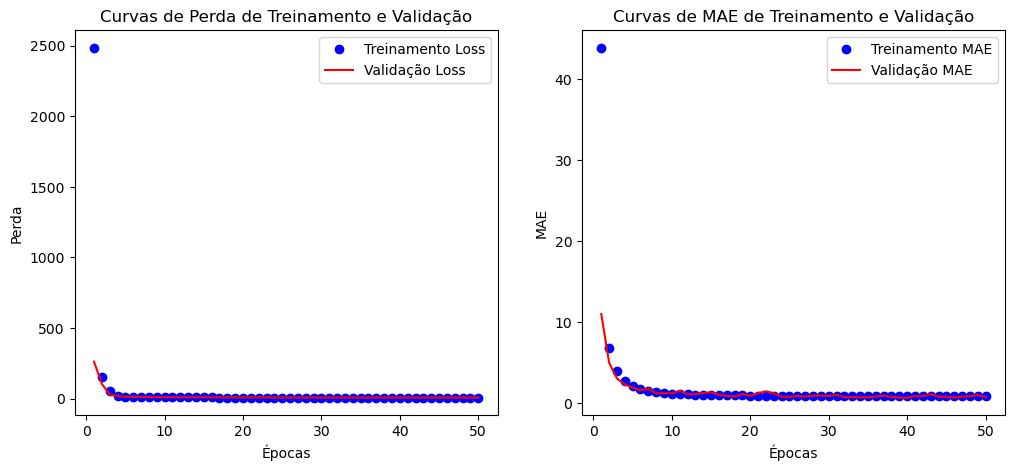

In [24]:
# Plotando a curva de perda
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs, training_loss, 'bo', label='Treinamento Loss')
plt.plot(epochs, validation_loss, 'r', label='Validação Loss')
plt.title('Curvas de Perda de Treinamento e Validação')
plt.xlabel('Épocas')
plt.ylabel('Perda')
plt.legend()

# Plotando a curva de MAE
plt.subplot(1, 2, 2)
plt.plot(epochs, training_mae, 'bo', label='Treinamento MAE')
plt.plot(epochs, validation_mae, 'r', label='Validação MAE')
plt.title('Curvas de MAE de Treinamento e Validação')
plt.xlabel('Épocas')
plt.ylabel('MAE')
plt.legend()

plt.show()